***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [7. Observing Systems](7_0_introduction.ipynb)  
    * Previous: [7.6 Polarization and Antenna Feeds](7_6_polarization.ipynb)
    * Next: [7.8 Radio Frequency Interference (RFI)](7_8_rfi.ipynb)
    
***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
import scipy.signal
from IPython.display import Image
import matplotlib.image as mpimg


# This section uses the optional slimscat package (https://krosenfeld.github.io/slimscat/current/)
try:
    import slimscat
    doExample = True
    #print(slimscat.__file__)
except ImportError:
    print('Warning: could not import slimscat, will not run example')
    doExample = False

## 7.7 传播效应 Propagation effects <a id='instrum:sec:propagation'></a><!--\label{instrum:sec:propagation}-->


来自宇宙的电磁波在被射电望远镜测量之前，会经历各种电离介质跟中性介质，期间所产生的效应有些可以忽略不计或易于改正，有些则会阻碍有用天体物理信息的获取，即便是用很高灵敏度的望远镜。本节将简要概述来自对流层、电离层、以及星际介质的主要信号衰减。

Cosmic radio waves go through a variety of ionized and neutral media before measurement at a radio telescope. Some effects are negliable and/or easily corrected for. Others, however, can prevent any useful astrophysical inference at all, regardless of the sensitivity of the telescope. This section will provide a brief overview of the dominant sources of signal corruption in the troposphere, ionosphere and interstellar media. 

### 7.7.1 星际介质 Interstellar medium <a id='instrum:sec:ism'></a><!--\label{instrum:sec:ism}-->

星际介质中充满了不均匀分布的等离子体，这种等离子体使电磁波发生散射，从而导致天体物理源的闪烁（视亮度变化），在低频时尤其明显。这里，我们将介绍一些基本的散射理论，也适用于其他天体物理介质。

The interstellar medium is filled with plasma that is not uniformly distributed. This plasma causes radio waves to scatter, and thus causes astrophysical sources to scintillate (vary in apparent brightness) - increasingly so at low frequency. Here we cover some basic scattering theory, which is of course applicable to the other astrophysical media discussed here. 

电磁波通过“折射率不均匀”的介质时会发生散射。通常用一个垂直于入射光的薄屏（相对于源的距离来说很薄）进行建模，该薄屏会在每个横向点上给入射波增加一个随机相位偏移，导致波前发生起伏（不平坦）。

An electro-magnetic wave passing through any medium with *refractive index inhomogeneity* will cause the wave to scatter. This effect is most commonly modeled as a thin screen (relative the to the distance to the source) perpendicular to the line-of-sight, which adds a random phase offset to the incoming wave at each transverse point, yielding what can be viewed as a 'corrugated' (not flat) wavefront. 

![](figures/corrugatedPhaseScreen.png)

**Figure 7.7.1**: 不规则等离子体导致波面散射的示意图。由于等离子体“薄屏”中的折射率不均匀，导致了斯托克斯相位偏差，射电望远镜阵列原本测到的恒定相位波面出现了波纹（图片来自Sanjay Bhatnagar的博士论文）。Schematic diagram showing scattering of a plane wave due to a irregular slab of plasma. As can be imagined, we would *expect* to measure a constant phase across the radio telescope array; instead, our measurement will now include a stochastic phase corruption caused by differing refractive indices at various parts of the plane (Image credit: Sanjay Bhatnagar PhD Thesis <a id='instrum:fig:corrugatedPhaseScreen'></a><!--\label{instrum:fig:corrugatedPhaseScreen-->


可以用相位结构函数描述波面起伏程度：

The degree of corrugation can be described by the phase structure function:

$$D_\phi (\mathbf{x},\mathbf{x'}) =\ < ( \phi(\mathbf{x} +\mathbf{x'}) - \phi(\mathbf{x}))^2>,$$

$\mathbf{x}$ and $\mathbf{x'} $ 表示等离子屏上的两个点。假定各项同性（即方向独立），根据湍流指数定律，上述表达式可以简化为：

where $\mathbf{x}$ and $\mathbf{x'} $ represent two points on the screen.
Assuming isotropy (i.e. no directional dependence), power law turbulence simplifies the expression to

$$D_{\phi} (r) =  (r/r_{\rm diff})^{\beta},\ \  (r^2 = \mathbf{x}^2 -\mathbf{x'}^2),$$

$r_{\rm diff}$ 表示相位屏上平均相位差为1弧度的距离，$\beta = 5/3$表征Kolmogorov湍流，很多时候，它是ISM和对流层的良好近似（参考Thompson et al. 2001）

where $r_{\rm diff}$, is the distance on the phase screen where the mean phase difference is equal to 1 radian. The exponent of $\beta = 5/3$ is characteristic of Kolmogorov turbulence, which is a good approximation for the ISM and troposphere in many circumstances (empirically verified, see Thompson et al. 2001, and refernce therein). 

另一个重要的长度指标是菲涅耳尺度Fresnel scale，定义为几何路径差等于$1/2$弧度处的相位屏的宽度，$r_{\rm F} = \sqrt{\lambda D/2\pi}$，其中$D$为观测者到散射屏的距离。这两个长度，即$r_{\rm F}$ 和 $r_{\rm diff}$，定义了散射特性。散射可以分为两类，一类是强散射，一类是弱散射。对于弱散射，$ r_{\rm diff} \gg r_{\rm F}$，因此$D_{\phi}(r_{\rm F}) \ll 1$；对于强散射，$ r_{\rm diff} \ll r_{\rm F}$，因此$D_{\phi}(r_{\rm F}) \gg 1$。

Another important length scale is the Fresnel scale, defined as the distance across the phase screen where the geometrical path difference is $1/2$ radian, $r_{\rm F} = \sqrt{\lambda D/2\pi}$, where $D$ is the distance between the observer and the scattering screen. These two length scales, $r_{\rm F}$ and $r_{\rm diff}$, define the nature of the scattering, which is split into the $\emph{strong}$ and $\emph{weak}$ regimes. In *weak scattering*, $ r_{\rm diff} \gg r_{\rm F}$ and hence, $D_{\phi}(r_{\rm F}) \ll 1$. In *strong scattering*, $ r_{\rm diff} \ll r_{\rm F}$ implying  $D_{\phi}(r_{\rm F}) \gg 1$. 

假设有一个“冻结屏”，其中散射屏内的微扩散运动远远小于整体运动，则结构函数变为$D(R)=D(t)|_{R=v T}$，其中$v$为散射屏的横向速度，T是积分时间。该假设认为，比起屏在望远镜视场中的移动，屏结构的变化要慢的多。这就使得屏的整体速度（而非屏的位置）成为结构函数的参数，后面可以看到，这种做法具有许多优点。

Assuming we have a "frozen screen", where micro-scale diffusion within the scattering screen is much smaller than the bulk motion, the structure function becomes  $D(R)=D(t)|_{R=v T}$ where $v$ is the scattering screen transverse velocity and T is the integration time. This assumption consists of assuming that the structure of the screen changes much, much slower than the time taken for the screen to move across the telescope's field of view. This allows the structure function to be parameterised in terms of the screen's bulk velocity, rather than position. This has a number of advantages, as will become clear. 

这些长度和时间尺度决定了射电成像中的各种散射效应，图Figure 7.7.2中总结了这些效应。表7.7.1给出了一些介质的参考值，可以把这些值插入到下面的ScatterBrane软件，用于测试不同情况下的散射状况，获得对散射效应的直观理解。本章末尾的附加阅读部分给出了更多更深入的参考。

These length- and time- scales determine a wide range of scattering effects in radio imaging, which are summarized in Figure 7.7.2. A full treatment of these is not our aim here, but Table 7.7.1 provides indicative values for a range of media, which can then be plugged into the *ScatterBrane* software below to test different regimes and gain a more intuitive understanding. The additional reading section at the end of the chapter will provide further references for more in-depth explanations. 

<img src='figures/scattering_table.png' width=70%>

**Table 7.7.1**: Typical values of scattering media in astronomy (Credit: Narayan 1992) <a id='instrum:fig:scattering_table'></a><!--\label{instrum:fig:scattering_table}-->

![](figures/scattering_imaging.png)

**Figure 7.7.2.** 不同散射下的成图状况，纵坐标为积分时间和菲涅耳时间($t_{\rm F} = r_{\rm F}/v$)之比，横坐标为散射强弱。可以用下面的ScatterBrane代码以及表7.7.1里的值计算得到。Different imaging regimes in the presence of scattering, shown as function of the integration time and Fresnel time ($t_{\rm F} = r_{\rm F}/v$) on the vertical axis and the strength of the scattering shown on the horizontal axis. These regimes can be explored using the *ScatterBrane* code below in combination with typical values from Table 7.7.1. (Credit: Narayan 1992) <a id='instrum:fig:scattering_imaging'></a><!--\label{instrum:fig:scattering_imaging}-->

以下代码来自[SLIMSCAT &#10142;](https://krosenfeld.github.io/slimscat/current/)，感谢Michael Johnson 和 Katherine Rosenfeld。改变输入参数和输入图像，可以看到成图中不同的散射效果。

The following code is taken from the [SLIMSCAT &#10142;](https://krosenfeld.github.io/slimscat/current/) package, courtesy of Michael Johnson and Katherine Rosenfeld. Changing the input parameter values and input image will give a more intuitive understanding of scattering effects in the different imaging regimes shown in Figure 7.7.2. 

In [4]:
if doExample:
    
    # construct gaussian source
    nx,ny = 220,256
    yy,xx = np.meshgrid(np.arange(ny)-ny/2,np.arange(nx)-nx/2,indexing='ij')
    isrc = np.exp(-0.5*(xx**2 + yy**2) / (0.07*np.min([nx,ny]))**2)
    
    slimscat.generate_screen(screenfile='gaussian_screen.bin')
    
    # scatter source
    iss = slimscat.run_slimscat(isrc,1.,screenfile='gaussian_screen.bin')

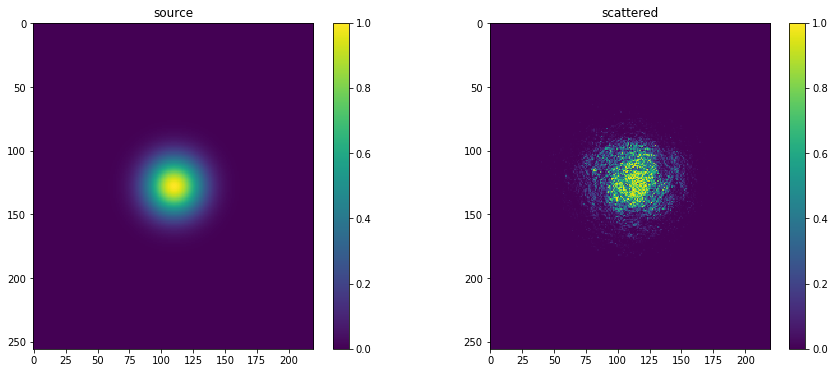

In [5]:
if doExample:
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.imshow(isrc,vmin=isrc.min(),vmax=isrc.max())
    plt.title('source')
    plt.colorbar()
    
    plt.subplot(122)
    plt.imshow(iss,vmin=isrc.min(),vmax=isrc.max())
    plt.title('scattered')
    plt.colorbar()

**Figure 7.7.3.** 对高斯源的强散射效应。Example of the effect of strong scattering on a Gaussian source.

从上面的图可以看出，散射会导致观测质量的显著下降。作者建议调节*slimscat.generate_screen* 和 *slimscat.run_slimscat*的所有参数，观察不同参数时候的散射效果，参考 [the slimscat webpage &#10142;](http://krosenfeld.github.io/slimscat)。

As we can see, scattering causes a significant degradation of the quality of the observations. The author recommends playing around with all the (hidden) input parameters of *slimscat.generate_screen* and *slimscat.run_slimscat* functions; for more information see [the slimscat webpage &#10142;](http://krosenfeld.github.io/slimscat). We finish with one of their fun examples, which is scattering Gargantua from the movie *Interstellar*. While this is simply illustrative, it is a real observational challenge faced by researchers trying to image the shadow of the black hole at the centre of our Galaxy. Our example will be done for three colour filters.

In [6]:
if doExample:
    # generate scattering file
    slimscat.generate_screen(wavelength=0.87e-6,dx=0.2,ips=4,screenfile='gargantua_screen.bin')
    # load RGB image with rough scale appropriate for Sgr A*
    model = mpimg.imread('figures/gargantua.jpg')
    dx = 50/300.
    nx,ny,nchan = model.shape
    
    # scatter each rgb channel separately (using same screen)
    r = slimscat.run_slimscat(model[:,:,0],dx,screenfile='gargantua_screen.bin')
    g = slimscat.run_slimscat(model[:,:,1],dx,screenfile='gargantua_screen.bin')
    b = slimscat.run_slimscat(model[:,:,2],dx,screenfile='gargantua_screen.bin')

Following the scattering, we need to smooth the image a little to better illustrate the result:

In [7]:
if doExample:
    N=5
    t = 1 - np.abs(np.linspace(-1, 1, N))
    kernel = t.reshape(N, 1) * t.reshape(1, N)
    kernel /= kernel.sum()
    rs = scipy.signal.convolve2d(r/255., kernel, mode='same')
    gs = scipy.signal.convolve2d(g/255., kernel, mode='same')
    bs = scipy.signal.convolve2d(b/255., kernel, mode='same')

Make the RGB cube and you're done:

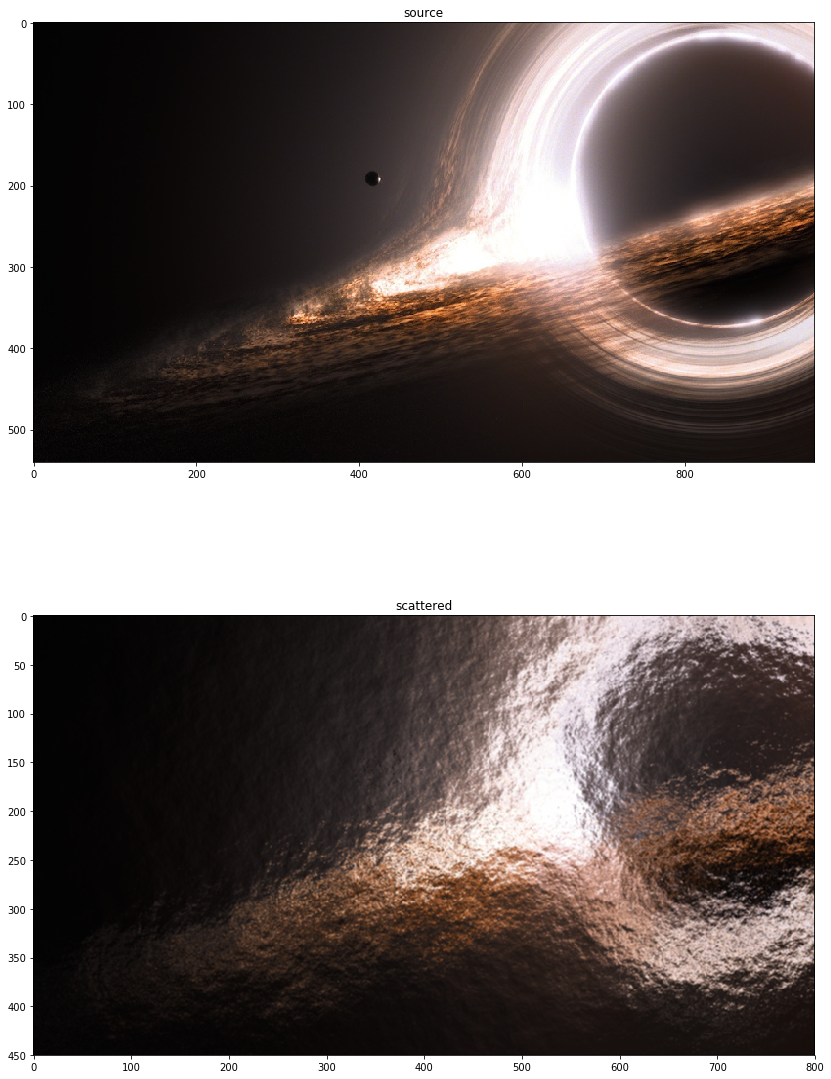

In [8]:
if doExample:
    rgb_uint8 = (np.dstack((rs,gs,bs)) * 255.).astype(np.uint8)
    
    plt.figure(figsize=(14,20))
    plt.subplot(211)
    plt.imshow(model[:,:,:])
    plt.title('source')
    plt.subplot(212)
    plt.imshow(rgb_uint8)
    plt.title('scattered')

**Figure 7.7.4**: RGB图的散射效应例子，图片来自电影Interstellar。  Fun colour example of a scattered RGB image of the black hole sillhouette of *Gargantua* (from the movie *Interstellar*).

如果增大观测波长，或者降低观测频率，我们将会看到，在用Event Horizon Telescope观测时，星际散射是测量黑洞阴影的主要障碍。该项目的细节请参考 [the EHT webpage &#10142;](http://www.eventhorizontelescope.org/)。

If you increase the wavelength of the observation, or decrease the frequency (see input to *slimscat.generate_screen*), you'll see how interstellar scattering can be a major barrier to successfully measuring the shadow of a black hole with the Event Horizon Telescope! See [the EHT webpage &#10142;](http://www.eventhorizontelescope.org/) for more details on this project. 

### 7.7.2 电离层 Ionosphere <a id='instrum:sec:ion'></a><!--\label{instrum:sec:ion}-->

电离层是一层电离的等离子体，其海拔高度为60-1000 km。 它主要是由来自太阳的紫外线光子驱动的，这些光子使大气的上层电离。 结果，存在一个自然的昼夜周期，其中离太阳最近的层是高度电离的。 该电离水平以单位总电子含量（TEC）进行测量，其中1 TEC单位（TECU）= $ 10 ^ {16} $ m $ ^ {-2} $。 使用事件地平线望远镜成功测量黑洞阴影的主要障碍！ 图7.7.5显示了在给定时间的TEC值的全局图，表明该图最集中在赤道附近。

电离层是一层被电离的等离子体，距离地球表面60-1000公里。受到主要来自太阳的紫外光子的激励，高层大气被电离，因此，电离层状态存在一个自然的昼夜周期，越接近太阳的地方电离程度越强。电离水平用单位总电子含量（Total Electron Content，TEC)进行度量，1个TEC单位（TECU）= $10^{16}$ m$^{-2}$，是Event Horizon Telescope望远镜测量黑洞阴影的一个主要障碍。图7.7.5展示了某时刻的全球TEC分布图，可以看出，赤道附近的电离水平较高。

The ionosphere is a layer of ionized plasma with an altitude range of 60-1000 km above sea level. It is mostly driven by ultraviolet photons from the Sun, which ionize the upper layers of the atmosphere. As a result, there is a natural diurnal cycle, with the layers nearest the Sun being the mostly highly ionized. This level of ionization is measured with the unit Total Electron Content (TEC), where 1 TEC unit (TECU) = $10^{16}$ m$^{-2}$. a major barrier to successfully measuring the shadow of a black hole with the Event Horizon Telescope! Figre 7.7.5 shows a global map with the TEC values at a given time, showing that this is most concentrated near the equator. 

![](figures/iono.png)

**Figure 7.7.5**: 某时刻的全球总电子含量分布，可以看出，最接近太阳的赤道附近TEC最强。Total Electron Content above the Earth at given time, showing the enhancement towards the equatorial regions nearest the Sun. (Image credit: [astrosurf &#10142;](http://www.astrosurf.com/luxorion/qsl-review-propagation-software-research.htm)) <a id='instrum:fig:iono'></a><!--\label{instrum:fig:iono}-->


电离层非常复杂，值得深入研究。这里，我们只讨论电离层对射电观测的主要不利影响。跟任何等离子体一样，电离层存在“振荡频率”或“等离子体频率“，其大小为 $$\nu_p = \frac{e}{2\pi}\sqrt{\frac{n_e}{\epsilon_0 m}} \ \simeq 9\sqrt{n_e} \ \ {\rm (Hz)}，$$其中，$e, n_e, \epsilon_0$分别表示自由空间的电子电荷、密度和介电常数。电离层等离子体频率通常小于$\nu_p \sim 15$ MHz，因此，电离层对低频信号不透明。电离层对地球上的低频宇宙观测不利，但是却有利于地球上的远距离无线通讯，因为电离层的下表面能反射电磁波。

The ionosphere is a complex subject, and the object of intensive study in and of itself. We will just describe the primary (adverse) effects it has on radio observations. Like any plasma, the ionosphere has an *oscillation frequency*, or *plasma frequency*, given by $$\nu_p = \frac{e}{2\pi}\sqrt{\frac{n_e}{\epsilon_0 m}} \ \simeq 9\sqrt{n_e} \ \ {\rm (Hz)},$$ where $e, n_e, \epsilon_0$ are the electron charge, density and permitivity of free space respectively. A typical value for the ionosphere's plasma frequency is less than $\nu_p \sim 15$ MHz. Note than the ionosphere is opaque to any radiation below this frequency. While this disadvantage in low frequency observations of the Universe from Earth, it has also be used to aid long-distance radio communication by reflecting radio waves off the lower surface of the ionosphere. 

电离层中的自由电子会导致入射电磁波产生传播延迟，表示为“超额路径长度excess path length“， $$L_0 \simeq -\frac{1}{2} \int^\infty_0 \left[ \frac{\nu_p(h)}{\nu}\right]^2 {\rm d}h, $$


The free electrons in the ionosphere cause a propogation delay of an incident electro-magnetic wave, which can be represented as an "excess path length", $$L_0 \simeq -\frac{1}{2} \int^\infty_0 \left[ \frac{\nu_p(h)}{\nu}\right]^2 {\rm d}h, $$


其中，$h$是高度。注意到公式里有$\nu^2$，这也解释了对于再电离时代探测这样的低频射电探测来说，电离层效应是需要解决的一大难题的原因。该延迟可以用琼斯矩阵形式表示，

where $h$ is the height above sea level. Note the $\nu^2$ dependance, which explains why the ionophere is a bigger problem for low radio frequency observations such as attempts to detect the epoch of reionization. Within the Jones matrix formalism, this delay can be represented as follows,

$$
\mathbf{Z} = Z = \left[ \begin{array}{cc}\mathrm{e}^{-2\pi \imath \tau / \lambda} & 0 \\ 0 & \mathrm{e}^{-2\pi \imath \tau / \lambda} \end{array} \right] = \mathrm{e}^{-2\pi \imath \tau / \lambda},
$$

该延迟形式上跟其它相位效应一样，前面已经讨论了很多。尽管$\mathbf{Z}$-Jones 矩阵里没有幅度效应，但值得注意的是，如果对数据做平均计算的时间规模大于电离层的本地动态时间规模（几秒到几十分钟），电离层所产生的延迟会导致相干损失，相干损失又会导致幅度损失。

which is of course the same as any other phase only effect, of which there are many described in this chapter. Although the $\mathbf{Z}$ Jones matrix has no amplitude effect, it is important to note that the variable or differential delay imposed by the ionsphere result in a loss of coherence if data are averaged on timescales larger than the local dynamic timescale for the ionosphere (seconds to tens of minutes). It is this loss of coherence that also results in an amplitude loss as described in the previous section.  

![](figures/Atmosphere_with_Ionosphere.png)

**Figure 7.7.6**: 大气层和电离层温度密度随高度的变化。 Comparison of atmospoheric and ionospheric temperature and density profiles as a function of height above sea level. <a id='instrum:fig:Atmosphere_With_Ionosphere'></a><!--\label{instrum:fig:Atmosphere_With_Ionosphere}-->


对于特定的观测频率，电离层对可见度数据的影响程度以及相应的校准难度取决于阵列的几何布局和台站的视场（FOV），总结如下：

1. **小阵列，小视场：** 整个阵列强相位相干，整个FoV强相位相干
2. **大阵列，小视场：** 整个阵列弱/没有相位相干，整个FoV强相位相干
3. **小阵列，大视场：** 整个阵列强相位相干，整个Fov弱相位相干
4. **大阵列，大视场：** 整个阵列弱/没有相位相干，整个FoV弱相位相干

For a given observing frequency, the extent to which the ionosphere corrupts the measured visibilies and the ease with which one can correct for its effects depends on the array geometry and station field of view (FoV). These can be best summarized as follows:

1. **small array, small FoV:** strong phase coherence across array and FoV
2. **large array, small FoV:** some/no phase coherence across array, strong phase coherence across FoV
3. **large array, small FoV:** strong phase coherence across array, some phase coherence across FoV
4. **large array, large FoV:** some/no phase coherence across array, some phase coherence across FoV


上述阵列跟视场的实际大小取决于观测频率和电离层湍流。然而，在几百兆赫兹频率处，“小阵列”的基线长度通常小于1公里，“小视场”的视场通常小于10 arcmin$^2$。在上面的第3、4种情况下，需要采用方向依赖校准解决电离层效应。目前有大量的宽视场低频仪器正处于设计建造过程中，因此，方向依赖校准是当前的研究热点。

Actual scales for the descriptions above depend on the observing frequencies and ionospheric turbulence. However, at a few hundred MHz, indicative values for "small arrays" can be given for baselines less than 1 km: an indicative value of a "small Fov" is < 10 arcmin$^2$. Cases 3 and 4 above demand that direction dependent calibration be performed to accurately solve for the ionospheric effects. This is an active field research due to the slew of low frequency, wide FoV instruments currently being designed or built.

![](figures/iono_regimes.png)

**Figure 7.7.7**: Four different radio array regimes with regard to ionospheric calibration (see text). Credit: Huib Intema (2013 Lorentz Center presentation). <a id='instrum:fig:iono_regimes'></a><!--\label{instrum:fig:iono_regimes}-->

### 7.7.3 对流层 Trophosphere <a id='instrum:sec:propagation'></a> <!--\label{instrum:sec:propagation}-->

对流层位于中性大气的最低层，厚度通常为2公里。在对流层，水蒸气对射电信号的折射约为光学/近红外信号的20倍（光学波段的极限分辨率约为1角秒）。对流层的水蒸气不均匀导致折射率不一致，从而引入了相位波动。由不均匀折射率($n$)所产生的延迟可以表示为$$\Delta t = \frac{1}{c} \int (n - 1) dy，$$，这里c为光速，折射路径长度为地线长度（这里为直线）。潮湿空气的折射用经典公式$$N = 77.6\frac{p_D}{T} + 64.8\frac{p_V}{T} + 3.776 \times 10^5 \frac{p_V}{T^2}, $$ 进行描述，其中，折射率为$N \equiv 10^6(n-1)$，$T$是开尔文温度，
$p_D$ 和 $p_V$ 分别表示干燥空气和水蒸汽的分压。由于大气遵从流体静力学平衡方程（非常近似），对流层折射率跟时间、季节、高度和纬度有关，同时，空气中的水蒸汽不均匀，与地面的气象参数没有很好的相关性。

This is the lowest layer of the neutral atmosphere and has typical scale height of 2 km. The refractivity of water vapour in this layer at radio wavelengths is of order 20x greater than in the optical/near-infrared (recall that typical "seeing" in the optical window is ~1 arcsec). Water vapour is poorly mixed in this layer, and phase fluctuations are introduced due to the resulting refractive index inhomogenities. The delay due to a non-unity refractive index ($n$) is $$\Delta t = \frac{1}{c} \int (n - 1) dy, $$ where c is the speed of light and the refractive path length is the geodesic (i.e. here, a straight line). The refractivity of moist air is described by the empirical formula $$N = 77.6\frac{p_D}{T} + 64.8\frac{p_V}{T} + 3.776 \times 10^5 \frac{p_V}{T^2}, $$ where the refractivity is $N \equiv 10^6(n-1)$, $T$ is the temperature in Kelvins, and $p_D$ and $p_V$ are the partial pressures of dry air and water vapor respectively. Since the atmosphere obeys the equation of hydrostatic equilibrium (to a good approximation), it is clear that to zeroth order, the trosphere's refractive index will have some dependence on time-of-day, time-of-season, site altitude and latitude. Note that water vapour is not well mixed in the atmosphere, and is therefore not well correlated with ground-based meteorological parameters.

![](figures/total_precipitable_water_201008.jpg)

**Figure 7.7.8.** 2010年8月的全球水蒸气分布图。 Map of the Earth showing water vapour content during August 2010. (NASA image by Robert Simmon) <a id='instrum:fig:total_precipitable_water_201008'></a><!--\label{instrum:fig:total_precipitable_water_201008}-->


对流层对高频射电观测($>> 10$~GHz)有影响，其中最重要（或不利）影响是：
1. 吸收
2. 折射
3. 湍流引起的散射

The troposphere has several effects on high frequency ($>> 10$~GHz) radio observations, the most important (or detrimental) being:

1. absorption
2. refraction 
3. turbulence-induced scattering

水蒸气、氧和臭氧中的压力增强分子共振导致了“吸收”（也称为“不透明”）现象。100GHz到1THz之间存在一系列的强水蒸气线，因此，毫米波观测站需要建在高海拔地区（$>2$ km），那里有几个大气窗口（见图7.8.2）。

*Absorption* (also known as the *opacity*) is due to pressure-broadened molecular resonances in water vapour, oxygen and ozone. There are a series of strong water vapour lines between 100 GHz to 1 THz. This explains the need for building millimetre observatories at high altitudes ($>2$ km), where several atmospheric windows are accessible (see Figure 7.8.2). 

平均折射是望远镜指向中必须进行改正的效应，随着仰角的降低，这种效应的影响越来越强。但是，小规模的对流层湍流会导致快速的相位波动，极大地制约了望远镜的灵敏度。在 $>$100 GHz 的情况下，即便是世界上最好的台站，相干时间也限制在 $\sim$10 秒范围。

The mean refraction is an effect that must be corrected in the telescope pointing, and increasingly so at low elevation. However, small-scale tropospheric turbulence results in rapid phase fluctuations, significantly limiting telescope sensitivity. At $>$100 GHz, coherence times are limited to $\sim$10 seconds, even for the best sites in the world. 

这些相位波动的功率谱通常描述为Kolmogorov湍流屏，其相结构函数定义为：

The power spectrum of these phase fluctuations are usually described as a Kolmogorov turbulent screen, with a phase structure function defined as:

$$D_\phi(d) = \ <[\Phi(x) - \Phi(x - d)]^2>, $$ 

其中，$\Phi(x)$ 是点$x$的相位，$\Phi(x-d)$ 是点$x-d$的相位，尖括号表示整体求平均。这就意味着，两点之间距离越近，它们的相位延迟越相似。这方面的文献非常多，这里不再赘述，有兴趣的可以参考Thompson et al. 2001。

where $\Phi(x)$ is the phase at point $x$, $\Phi(x-d)$ is the phase at point $x-d$, and the angle brackets represent the ensemble average. This implies that the closer two points are to one another, the more similar their phase delay will be. The literature covering this subject is truly vast, and will not be covered in further detail here, but the keen reader is encouraged to refer to Thompson et al. 2001, and reference therein.

对流层的琼斯方程跟电离层一样，也会造成额外的幅度损失。

In terms of the Jones matrix formalism, the troposhere is equivalent to the ionosphere, with an additional amplitude loss term due to non-zero atmospheric opacity. 

![](figures/ALMAatmo.jpg)

**Figure 7.7.9.** ALMA所在地Chajnantor的大气透射曲线（能穿透介质的折射），横线对应ALMA接收波段（1-10）。Transmission curves (fraction of radiation that is able to traverse a medium) above the ALMA site Chajnantor. The lines correspond to the frequency coverage of the ALMA receiver bands (1-10).  (Image credit: [ESO &#10142;](http://www.eso.org/sci/facilities/alma/documents.html)) <a id='instrum:fig:ALMAatmo'></a><!--\label{instrum:fig:ALMAatmo}-->


不同情况下，大气的相位破坏程度不同。一种极端情况是，两面天线重叠，拥有相同大气，另一种极端情况是VLBI，两处天线的天气情况完全不同。下图展示了甚大阵（Very Large Array，VLA）的基线长度跟相位相关性的关系，坡度变化反映了大气结构函数的变化。

There are different regimes of atmospheric phase corruption. One extreme case is when two antennas look through the exact same atmosphere, and the other extreme is VLBI baselines, where the weather above two antennas would be entirely un-correlated. The figure below shows the level of phase-correlation above the Very Large Array as a function of baseline length. The changes in slopes map the changes of the atmospheric structure function. 

![](figures/carilli_holdaway1999.png)

**Figure 7.7.10.** 基于BnA阵列VLA 22 GHz观测的相位均方根结构函数。空心圆圈表示在90分钟内，1 Jy校准源（0748 + 240）的均方根值与基线长度的关系。 实心正方形表示以正交方式减去10$^\circ$的恒定噪声所得到的值，揭示了潜在的对流层结构函数。 这三种状态均通过Kolmogorov湍流理论预测得到。

Root phase structure function based on BnA array VLA 22 GHz observations. Open circles show the phase rms versus baseline length towards a 1 Jy calibrator source (0748+240) over the course of 90 minutes. The filled squares show the same values with a constant noise value of 10$^\circ$ subtracted in quadrature, revealing the underlying tropospheric structure functions. All three regimes are predicted by Kolmogorov turbulence theory. (Image credit: Carilli & Holdaway 1999) <a id='instrum:fig:carilli_holdaway1999'></a><!--\label{instrum:fig:carilli_holdaway1999}-->

***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [7. Observing Systems](7_0_introduction.ipynb)  
    * Previous: [7.6 Polarization and Antenna Feeds](7_6_polarization.ipynb)
    * Next: [7.8 Radio Frequency Interference (RFI)](7_8_rfi.ipynb)
    
***